<a href="https://colab.research.google.com/github/ryota0051/stabel_diffuser_demo/blob/main/stable_diffuser_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers==0.3.0 transformers scipy ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 45.1 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 120 kB 68.7 MB/s 
     |████████████████████████████████| 6.6 MB 70.1 MB/s 


## モデル読み込み

In [10]:
# トークン取得
# 1. huggingfaceにアカウントを作成
# 2. トークン作成
# 3. https://huggingface.co/CompVis/stable-diffusion-v1-4 で認証しておく
TOKEN = '' # トークンを入力

In [25]:
from diffusers import StableDiffusionPipeline
from PIL import Image

In [18]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=TOKEN)
pipe.to("cuda")

{'trained_betas'} was not found in config. Values will be initialized to default values.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.3.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## 画像生成

In [26]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
  
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

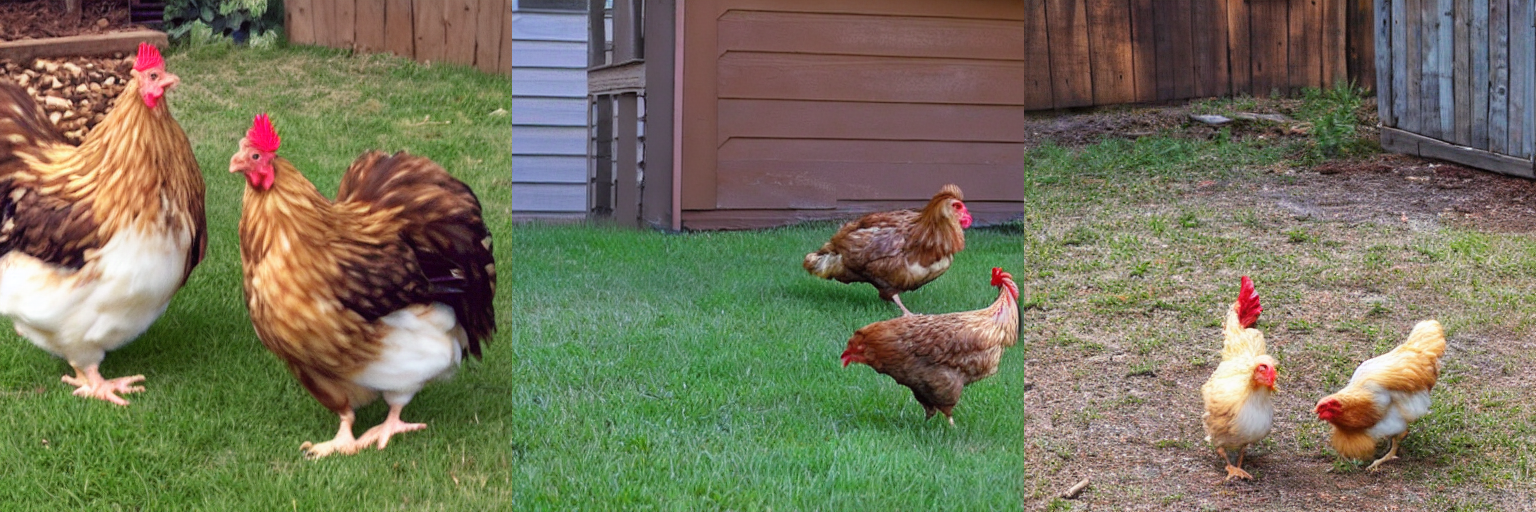

In [31]:
prompts = ["there are two chikens in the yard."] * 3
# gpuのメモリが足りないのでfor ループで 1文章単位で作成
images = [pipe(prompt).images[0] for prompt in prompts]
image_grid(images, rows=1, cols=3)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

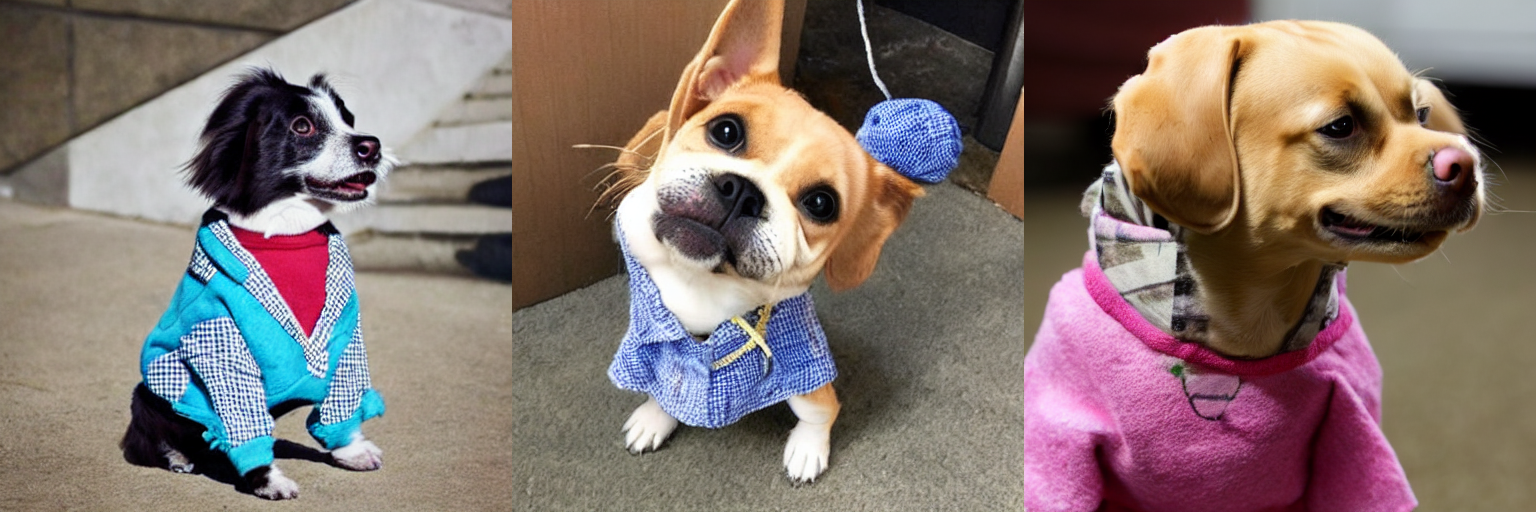

In [39]:
prompts = ["a dog in clothes"] * 3
# gpuのメモリが足りないのでfor ループで 1文章単位で作成
images = [pipe(prompt).images[0] for prompt in prompts]
image_grid(images, rows=1, cols=3)